<a href="https://colab.research.google.com/github/RanojoyBiswas/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## <b>The Approach :</b>

### <b>We will need to build a machine learning algorithm on top of our data, which will help us predict the number of bikes that would be rented based on the different informations and attributes given in the dataset.</b>

### <b>'Rented Bike Count' column can be used as the dependent variable to train a *supervised ml algorithm.</b>

### <b>The count of rented bikes is continuous type. So, our best approach would be to implement *regression models.</b>


### *<b>Supervised Ml algorithm</b> : Supervised learning, also known as supervised machine learning, is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. As input data is fed into the model, it adjusts its weights until the model has been fitted appropriately, which occurs as part of the cross validation process.

### *<b>*Regression models</b> : Regression is a technique for  investigating the relationship between independent variables or features and a dependent variable or outcome. It’s used as a method for predictive modelling in machine learning, in which an algorithm is used to predict continuous outcomes.*  

### *Regression is a method for understanding the relationship between independent variables or features and a dependent variable or outcome. Outcomes can then be predicted once the relationship between independent and dependent variables has been estimated. Regression is a field of study in statistics which forms a key part of forecast models in machine learning. It’s used as an approach to predict continuous outcomes in predictive modelling, so has utility in forecasting and predicting outcomes from data. Machine learning regression generally involves plotting a line of best fit through the data points. The distance between each point and the line is minimised to achieve the best fit line.*



---



### <b>Importing packages and libraries are second nature to any data scientist. That's exactly what we are going to do here.We shall start off by importing the absolute necessary packages and as we continue working on the data, we will be adding more to the list.</b>

In [1]:
#invite people for the party
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr # Pearson's r

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime, timezone, timedelta


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

from math import sqrt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


In [2]:
# mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pandas read_csv() method reads the csv file and we are storing the data in a dataframe format. We are calling it 'dataset'.

In [3]:
# reading data set
dataset = pd.read_csv('/content/drive/MyDrive/ML Regression Projects/Bike Sharing Demand Prediction - Ranajay Biswas/Datasets & Resources/SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
# top 5 rows of the data
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# last 5 rows of the data
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# checking the shape of our data
dataset.shape

(8760, 14)

In [7]:
# checking columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# datatypes and null values overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### *Dataset has 8760 rows and 14 columns. And it contains object, integer and float data types*...

### <b>*Discovering if there are any Null values in the data* ---

In [9]:
# checking the null values
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can also plot a chart for checking the null values in all the columns

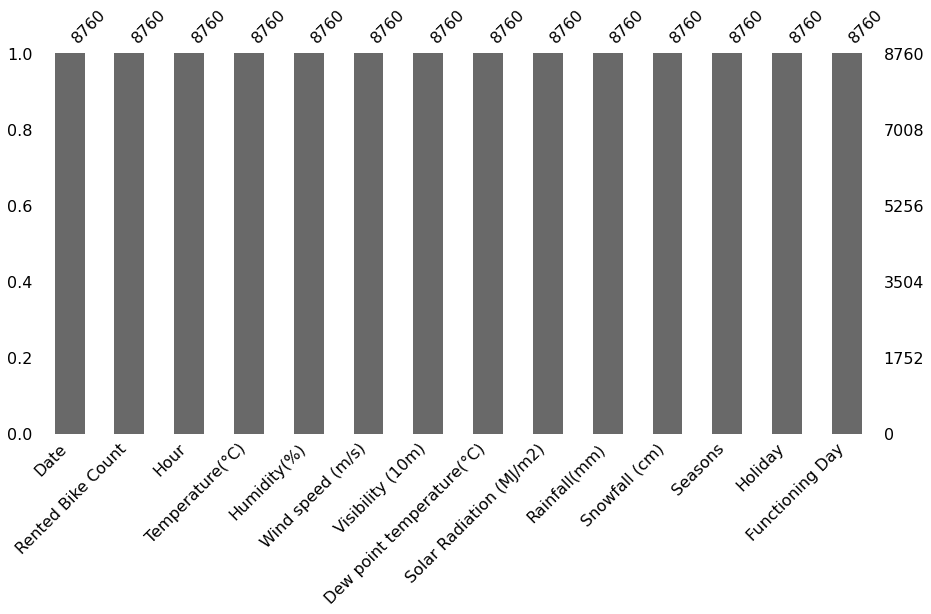

In [10]:
# plotting for null values
msno.bar(dataset, figsize = (15,7))

### *Looks like there are no null values present in the data..*

### <b>Descriptive Stats ---

In [11]:
# descriptive statistics
dataset.describe(percentiles=[.1, .9])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
10%,64.000000,2.000000,-3.700000,32.000000,0.600000,436.900000,-15.300000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
90%,1671.100000,21.000000,28.000000,86.000000,3.200000,2000.000000,21.000000,2.051000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### *Looks like we will be needing to do some normalizations to our data since different columns are on different scales..*

### <b>Checking for duplicate values in the data..</b>

In [12]:
# duplicate
len(dataset[dataset.duplicated()])

0

### *No duplicate values found in the data...*

# <b>*EDA & Data Preprocessing* ----

### <b>Exploratory Data Analysis(EDA)</b>
### What is EDA? Exploratory Data Analysis: this is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages.

In [13]:
# making a copy of the original dataset 
df = dataset.copy()

### *Changing the column names* ---

Declaring new column names for better accessibility and readability.

In [14]:
# new col names
df.columns = ['Date',	'Rented_bike_count', 'hour',	'temperature',	'humidity',	'wind_speed',	'visibility',	'dew_point_temperature',	'solar_radiation',	'rainfall',	'snowfall',	'seasons',	'holiday',	'functioning_day']

In [15]:
df.head()

,Date,Rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [16]:
# checking for unique values in each column
df.nunique()

Date                      365
Rented_bike_count        2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radiation           345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functioning_day             2
dtype: int64

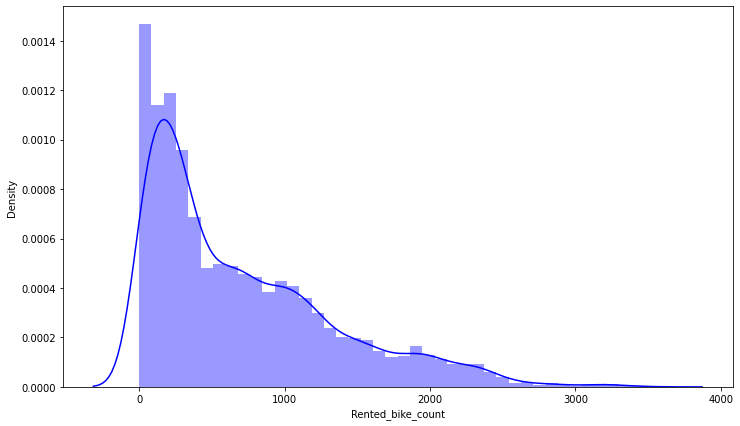

In [17]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(12,7))
sns.distplot(df['Rented_bike_count'],color="b")

*Dependent variable has right skewness*

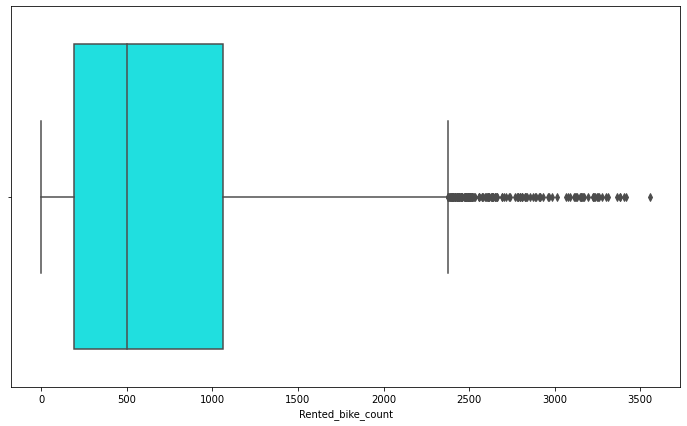

In [18]:
# plotting a boxplot
plt.figure(figsize=(12,7))
sns.boxplot(df['Rented_bike_count'], color= 'cyan')

*Many Outliers are present...*

*These outlier values are the values which are much larger the most of the other values in the dependant column.*

*Since, this values can actually be real values, we cannot drop them..*

### <b> Transformation </b>
<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data

<b>Linearity and heteroscedasticity:</b>
First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values
If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

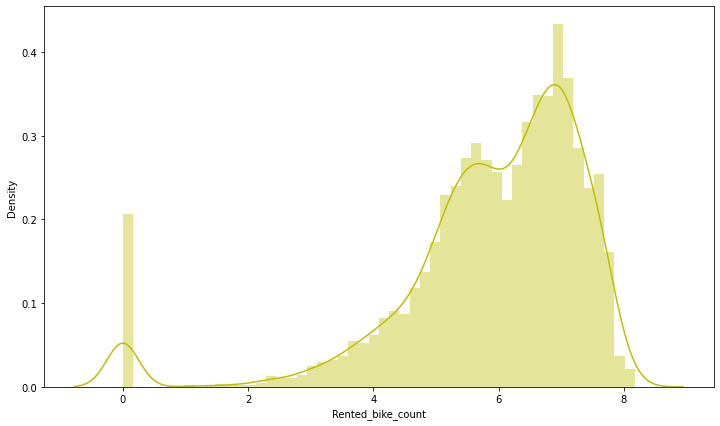

In [19]:
# Dependent variable 'Rented Bike Count' after log transformation
plt.figure(figsize=(12,7))
sns.distplot(np.log1p(df['Rented_bike_count']),color="y")     #log1p transformation is done since there are some 0 values present in the column

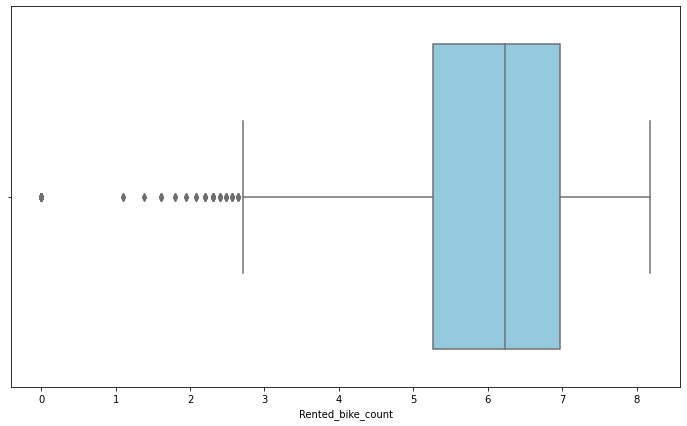

In [20]:
# plotting a boxplot
plt.figure(figsize=(12,7))
sns.boxplot(np.log1p(df['Rented_bike_count']), color = 'skyblue')

We performed log1p transformation since some values were 0 in the rented bike count column.

*After a log transformation, it becomes negatively skewed...but we can work with them. But before that, let's do some more inspection...*

### Let's check the square root transformation

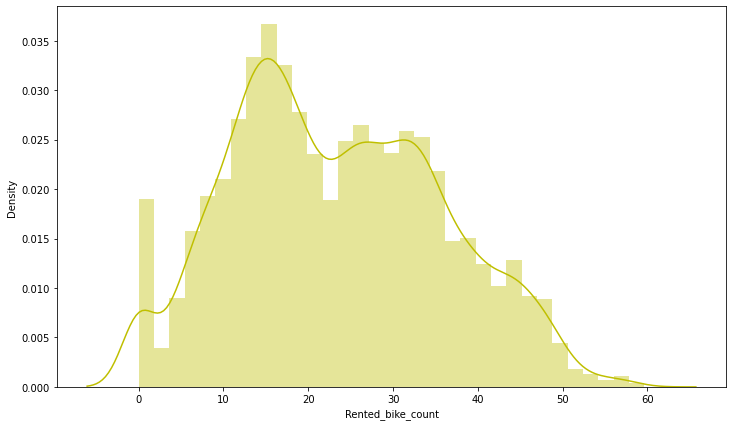

In [21]:
#performing the square root transformation on the dependant variable and checking the distribution
plt.figure(figsize=(12,7))
sns.distplot(np.sqrt(df['Rented_bike_count']),color="y")

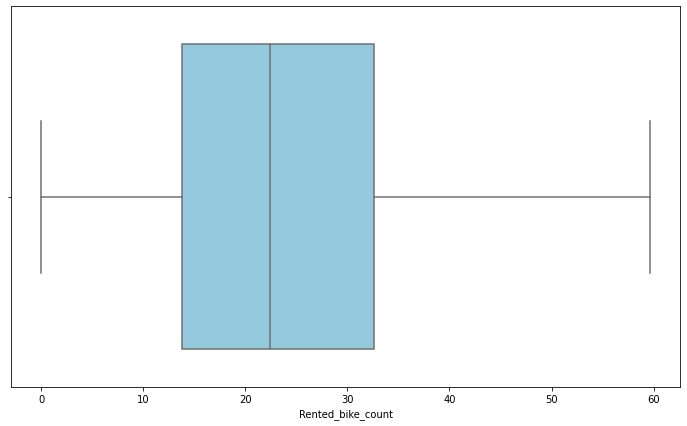

In [22]:
# plotting a boxplot
plt.figure(figsize=(12,7))
sns.boxplot(np.sqrt(df['Rented_bike_count']), color = 'skyblue')

Square root transformation worked really well with the dependant variable. It made the distribution nearly a normal distribution. And checking the boxplot, we can also see that the outliers are also being taken care of..

### *Let's check what's the deal with the 0 values in the Rented Bike Count column.*

In [23]:
df[df['Rented_bike_count'] == 0]

,Date,Rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


An interesting thing that we can see is that for every observation, where the rented bike count is 0, it's saying 'No' in the functioning_day column.
Let's confirm that.

In [24]:
# checking for unique values in the functioning day column where the count for rented bikes is 0
df[df['Rented_bike_count'] == 0]['functioning_day'].unique()

array(['No'], dtype=object)

 As we expected, that is the the case. The only time we got observations showing us value 0 for bike rentals, it's a non-functioning day.

In [25]:
# dropping the functioning day column
df.drop('functioning_day', axis = 1, inplace = True)

In [26]:
# dropping the observations that were 0 for rented bike count. 
df = df[df['Rented_bike_count'] != 0]

 We dropped the observations mainly because they are not going to help us predict and also they were simply just the values for the days when the services were shut down or in other words 'non-functioning days'.

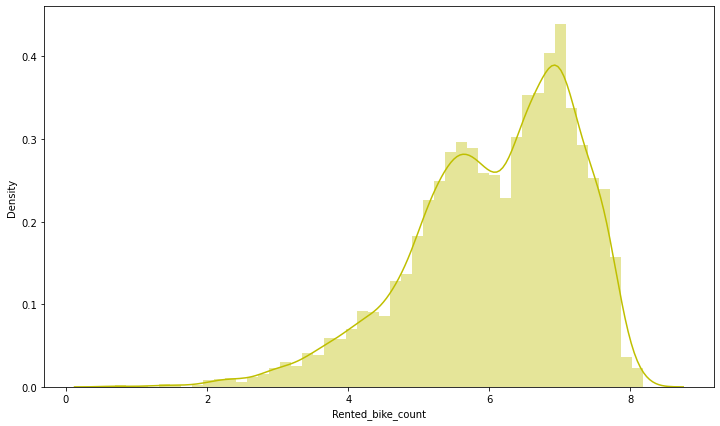

In [27]:
# Dependent variable 'Rented Bike Count' after log transformation
plt.figure(figsize=(12,7))
sns.distplot(np.log(df['Rented_bike_count']),color="y")

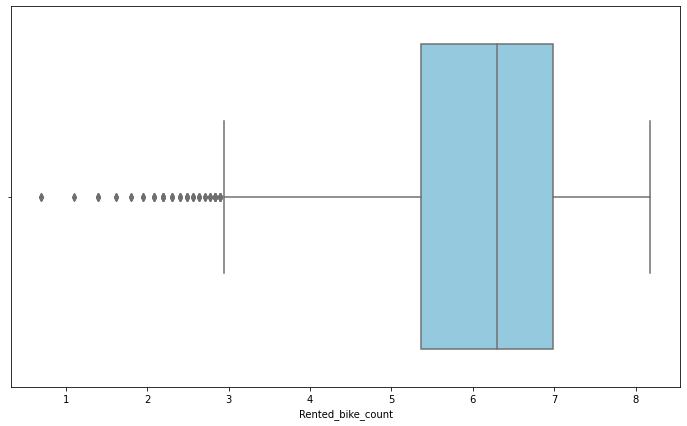

In [28]:
# plotting a boxplot
plt.figure(figsize=(12,7))
sns.boxplot(np.log(df['Rented_bike_count']), color = 'skyblue')

### *'Date' column values are converted to datetime format from object type..So that we can further work on this column...*

In [29]:
# 'Date' column datatype is changed to datetime format from object type
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [30]:
df['Date'][195:300]

195   2017-09-12
196   2017-09-12
197   2017-09-12
198   2017-09-12
199   2017-09-12
         ...    
295   2017-12-13
296   2017-12-13
297   2017-12-13
298   2017-12-13
299   2017-12-13
Name: Date, Length: 105, dtype: datetime64[ns]

### <b> *Creating new columns day, date, month & year from 'Date' column...*

In [31]:
# extracting day of the week, date, month and year from the datetime column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['date'] = df['Date'].dt.day
df['day'] = df['Date'].dt.day_name()

We don't need the original date column anymore. So, dropping the column..

In [32]:
# dropping the 'Date' column
df.drop('Date', inplace = True, axis = 1)

In [33]:
# checking the head
df.head()

,Rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,year,month,date,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday


### Checking the count of bike rentals each day

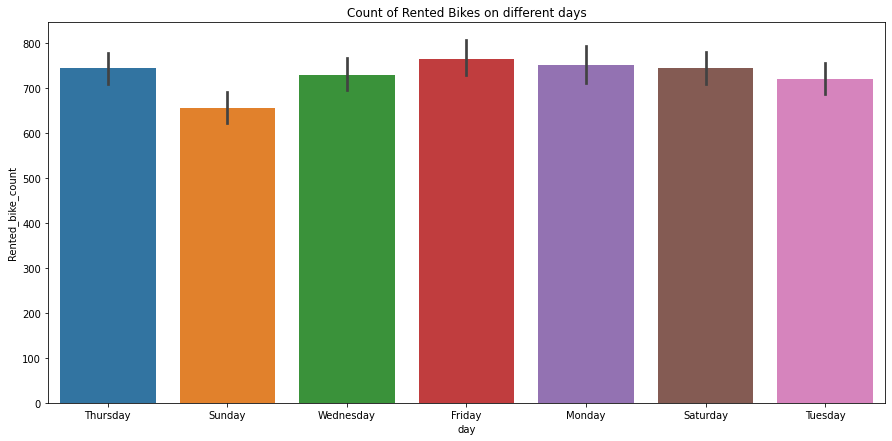

In [34]:
# plt.plot(df['Rented_bike_count'], df['day'])
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'day' , y = 'Rented_bike_count', data = df)
ax.set_title('Count of Rented Bikes on different days')
plt.show()

### *Since, we are not really seeing any kind of huge rise or fall of bike rentals for any particular day of the week, we can use this 'day' column to create another column which will be containing value = 1 if the given day was 'Saturday', or 'Sunday'... And for the rest of the days, the value will be 0*

### *Let's call this column 'weekend_days'...*

In [35]:
# creating new column called 'weekend_days' to assign value of '1' to Saturdays & Sundays and '0' for every other day
df['weekend_days'] = df['day'].apply(lambda x : 1 if x== 'Saturday' or x== 'Sunday' else 0)


# checking the value counts for weekend_days column
df['weekend_days'].value_counts()

0    6024
1    2441
Name: weekend_days, dtype: int64

### We are creating a class for feature encoding with different methods of encoding for various features...

In [36]:
class Encoder:

  def __init__(self, data):
    """Dataframe needs to be passed"""
    self.data = data


  def one_zero_encoder(self, existing_col, value):

    """ Inputs : column name(to check), column value(to check)
    Returns an encoded array """
    self.existing_col = existing_col
    self.value = value

    new_col = np.empty(shape = (1,0), dtype = int)    # empty numpy array to store the results

    for i in self.data[self.existing_col]:         # looping through the dataframe column values
      if i == self.value:
      # checking for matching values 
        new_col = np.append( new_col, 1 ) #assigning value of 1 for a match
      else:
        new_col = np.append( new_col, 0 ) #assigning value 0 for bo match

    return new_col




  # def time_mapper(self, col):

  #   """ Inputs : hour column,
  #   Bins the hours based on criteria and
  #   Returns an array with the appropiate time of day"""
  #   self.col = col

  #   time_of_day = np.empty(shape = (1,0), dtype = int)    # empty numpy array to store the results

  #   for i in self.data[self.col]:         # looping through the dataframe column values
      
  #     if (23 <= i <= 4):
  #       time_of_day = np.append( time_of_day, 'night_time' ) # for midnight to 4 am
  #     elif (5 <= i <= 8):
  #       time_of_day = np.append( time_of_day, 'morning' ) # for 5 am to 8 am
  #     elif (9 <= i <= 12):
  #       time_of_day = np.append( time_of_day, 'day_time' ) # for 9 pm to 12 pm
  #     elif (13 <= i <= 17):
  #       time_of_day = np.append( time_of_day, 'afternoon' ) # for 1 pm to 5 pm
  #     else:
  #       time_of_day = np.append( time_of_day, 'evening' ) # for 6 pm to 10 pm

  #   return time_of_day




  # def Quarter(self, month_val):

  #   """ Inputs : month column,
  #   Bins the month based on criteria and
  #   Returns an array with the appropiate quarter"""
  #   self.month_val = month_val

  #   q = np.empty(shape = (1,0), dtype = int)    # empty numpy array to store the results

  #   for i in self.data[self.month_val]:         # looping through the dataframe column values

  #     if (1 <= i <= 3):
  #       q = np.append( q, 'q1' ) # for Jan-March(1-3)
  #     elif (4 <= i <= 6):
  #       q = np.append( q, 'q2' ) # for April-June(4-6)
  #     elif (7 <= i <= 9):
  #       q = np.append( q, 'q3' ) # for July-Sep(7-9)
  #     else:
  #       q = np.append( q, 'q4' ) # for Oct-Dec(10-12)

  #   return q

### *For Holiday column ---*

In [37]:
# value counts for 'Holiday' column
df['holiday'].value_counts()

No Holiday    8057
Holiday        408
Name: holiday, dtype: int64

In [38]:
obj = Encoder(df)

In [39]:
# using self defined function, assigning value of '1' for holidays and '0' for no holidays
hday = obj.one_zero_encoder('holiday', 'Holiday')

df['holiday'] = hday.tolist()  

In [40]:
# checking the value count after tranformation
df['holiday'].value_counts()

0    8057
1     408
Name: holiday, dtype: int64

### *For 'Functioning Day' column ---*

In [41]:
# # value counts for 'Functioning Day' column

# df['functioning_day'].value_counts()

In [42]:
# # assigning value of '1' to functioning days and '0' to not functioning days
# func_day = obj.one_zero_encoder('functioning_day', 'Yes')

# df['functioning_day'] = func_day.tolist()  

In [43]:
# # value counts for 'Functioning Day' column after transformation

# df['functioning_day'].value_counts()

### *Checking the Season column ---*

In [44]:
# value counts for 'Seasons' column
df['seasons'].value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: seasons, dtype: int64

*Season column has 4 unique values which are four different seasons... So, we shall need to do one hot encoding...*

*We shall do that later...*

### *'Year' and 'day' variables are not going to be needed anymore.. So, we will be dropping them...*

In [45]:
df.drop('day', inplace= True, axis = 1)
df.drop('year', inplace= True, axis = 1)

In [46]:
df.nunique()

Rented_bike_count        2165
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1780
dew_point_temperature     556
solar_radiation           345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
month                      12
date                       31
weekend_days                2
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_bike_count      8465 non-null   int64  
 1   hour                   8465 non-null   int64  
 2   temperature            8465 non-null   float64
 3   humidity               8465 non-null   int64  
 4   wind_speed             8465 non-null   float64
 5   visibility             8465 non-null   int64  
 6   dew_point_temperature  8465 non-null   float64
 7   solar_radiation        8465 non-null   float64
 8   rainfall               8465 non-null   float64
 9   snowfall               8465 non-null   float64
 10  seasons                8465 non-null   object 
 11  holiday                8465 non-null   int64  
 12  month                  8465 non-null   int64  
 13  date                   8465 non-null   int64  
 14  weekend_days           8465 non-null   int64  
dtypes: f

### Variables like **Hour** , **Seasons** , **Holiday**,  **Functioning Day**, **Month**, **date** and **weekend_days** should be categorical in nature raher than numerical or object type. So, we shall omit them when checking the distributions for numerical variables...

In [48]:
# changing the data type
cols = ['hour', 'seasons', 'holiday', 'month', 'date', 'weekend_days']
for col in cols:
  df[col] = df[col].astype('category')

In [49]:
# declaring numeric features 
numeric_features = df.describe().columns

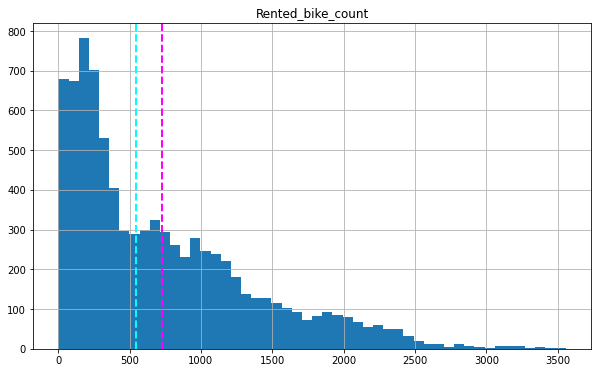

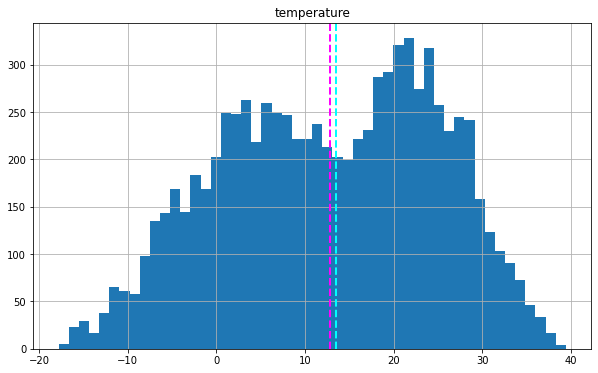

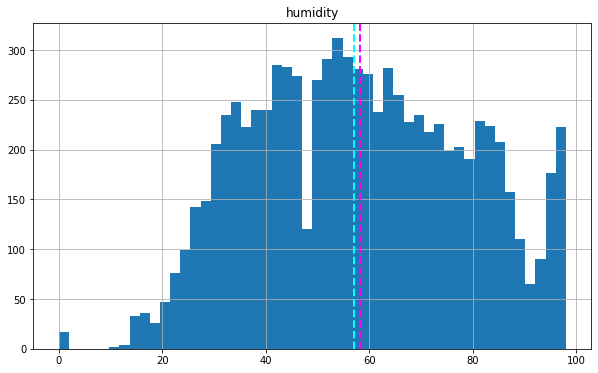

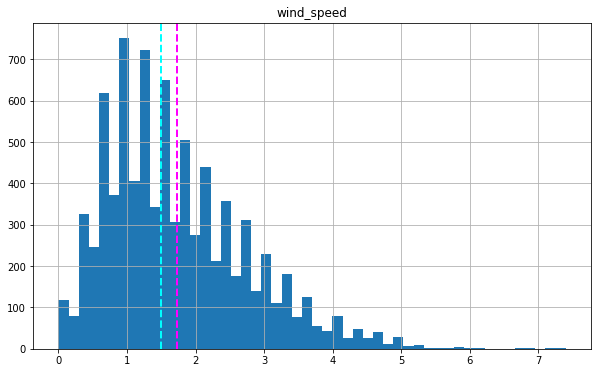

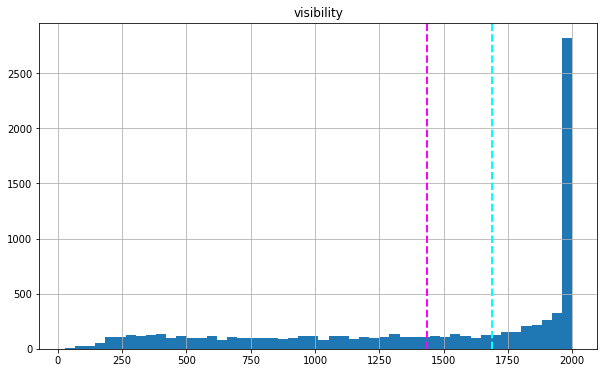

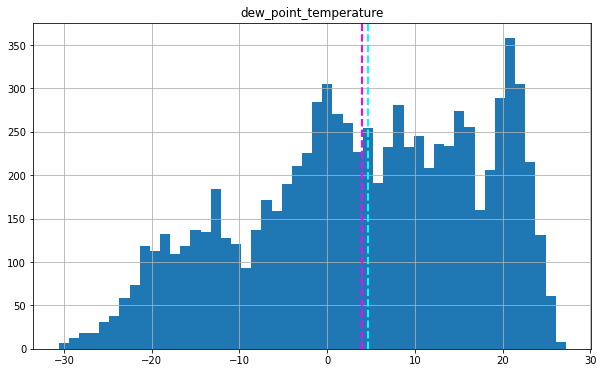

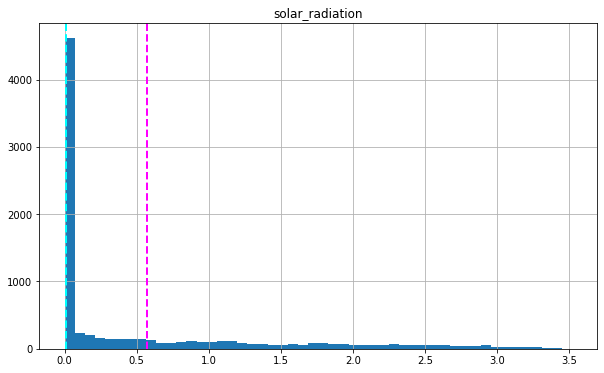

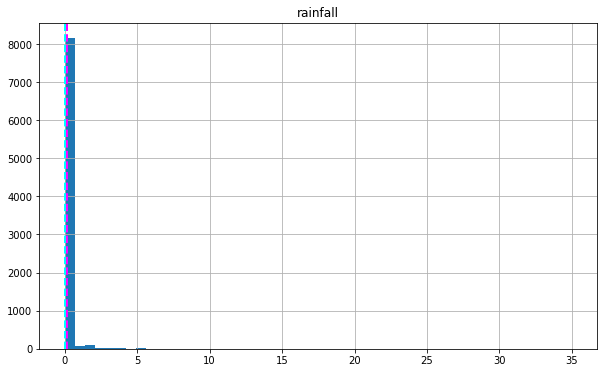

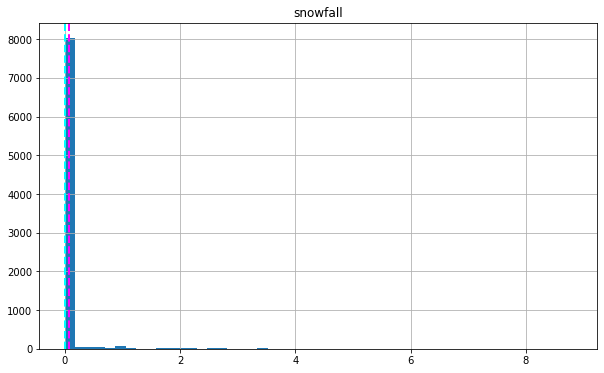

In [50]:
# plotting histogram
for col in numeric_features[:]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

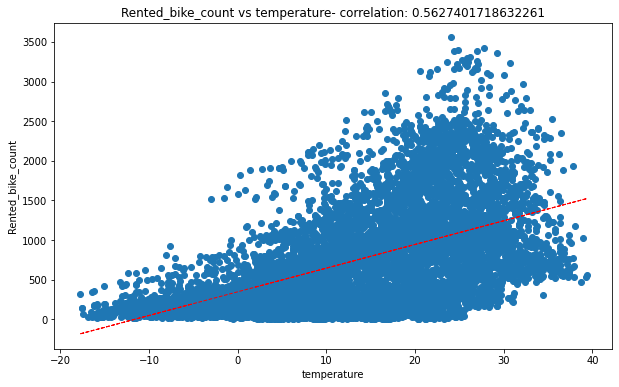

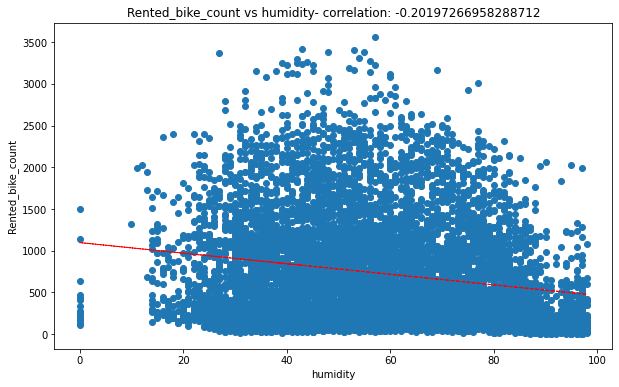

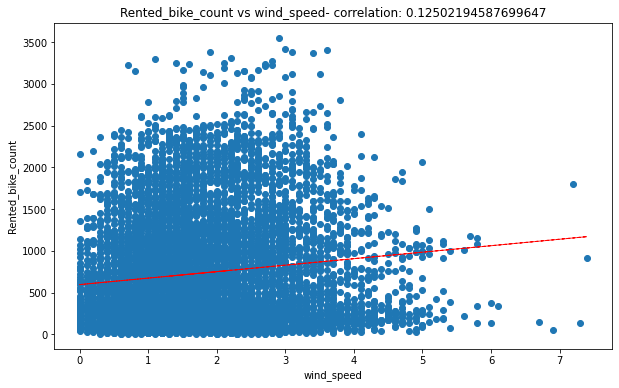

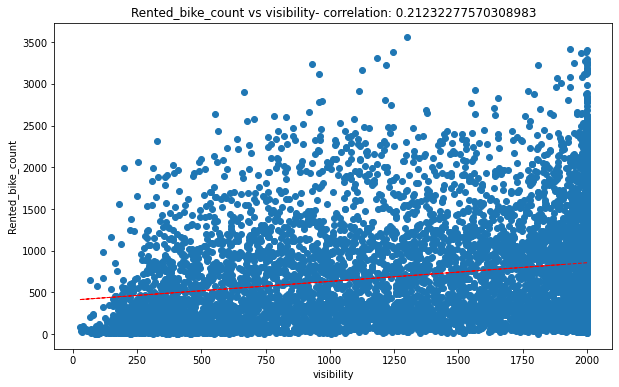

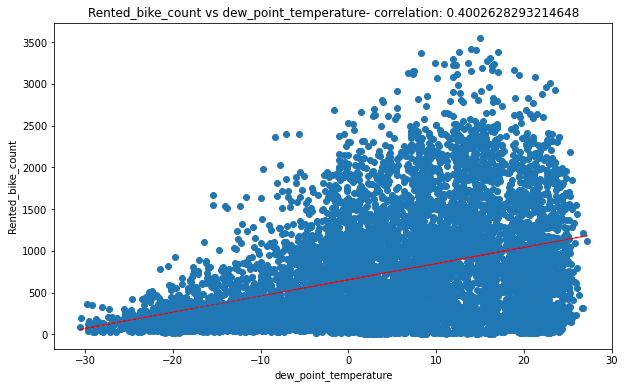

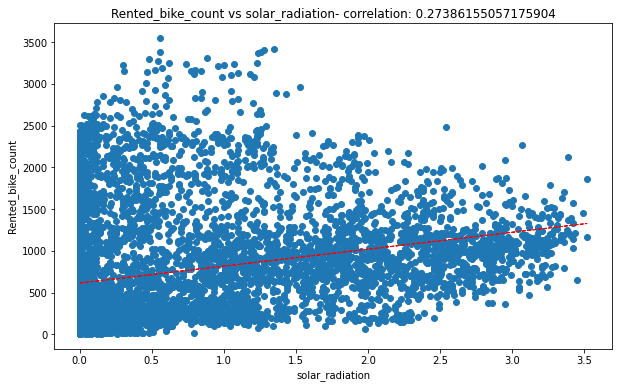

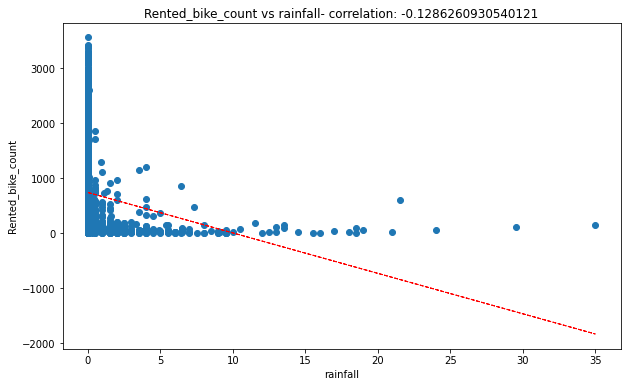

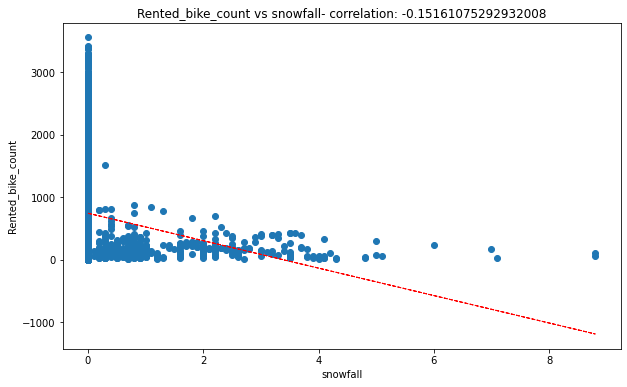

In [51]:
# correlation
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented_bike_count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_bike_count')
    ax.set_title('Rented_bike_count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented_bike_count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

*   ### *'Snowfall' and 'Rainfall' have negative correlation with our dependent variable 'Rented Bike Count'.*

*   ### *All the other variables have somewhat of a positive correlation.*

*   ### *'Temperature' has the highest positive correlation with bike count. The value of correlation is approx 0.538*






### <b>*Correlation Matrix*</b>

In [52]:
# coorelation
correlation = df.corr()
correlation

,Rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall
Rented_bike_count,1.000000,0.562740,-0.201973,0.125022,0.212323,0.400263,0.273862,-0.128626,-0.151611
temperature,0.562740,1.000000,0.166425,-0.038481,0.028262,0.914467,0.354844,0.052149,-0.217746
humidity,-0.201973,0.166425,1.000000,-0.337352,-0.548542,0.539402,-0.457273,0.236917,0.110127
wind_speed,0.125022,-0.038481,-0.337352,1.000000,0.180428,-0.177170,0.326222,-0.024931,-0.003789
visibility,0.212323,0.028262,-0.548542,0.180428,1.000000,-0.182586,0.153046,-0.170352,-0.122860
dew_point_temperature,0.400263,0.914467,0.539402,-0.177170,-0.182586,1.000000,0.098525,0.126812,-0.149760
solar_radiation,0.273862,0.354844,-0.457273,0.326222,0.153046,0.098525,1.000000,-0.074157,-0.073380
rainfall,-0.128626,0.052149,0.236917,-0.024931,-0.170352,0.126812,-0.074157,1.000000,0.008604
snowfall,-0.151611,-0.217746,0.110127,-0.003789,-0.122860,-0.149760,-0.073380,0.008604,1.000000


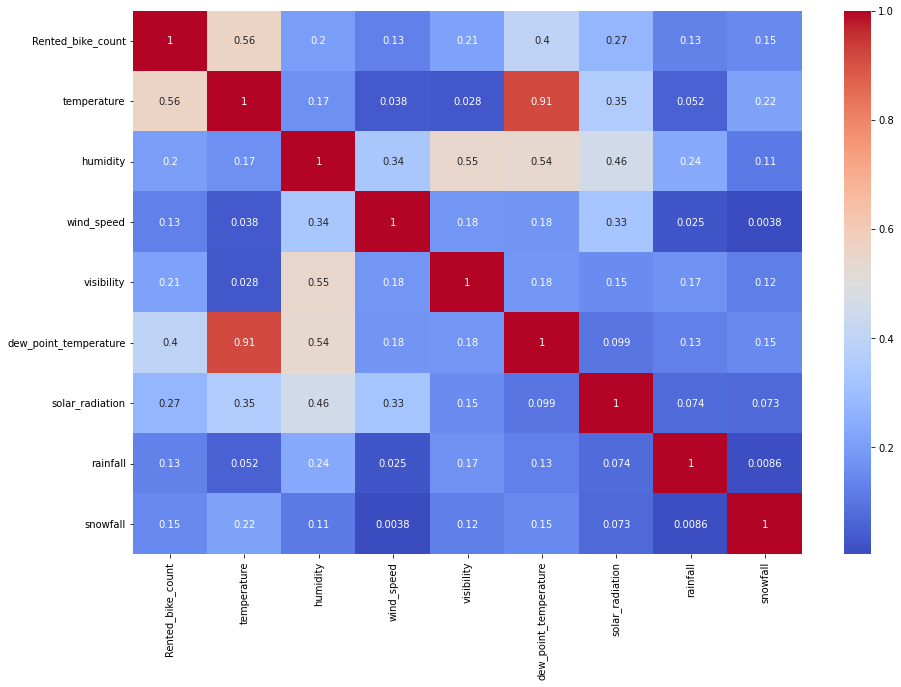

In [53]:
## Correlation heatmap
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

### <b>*It seems that 'Dew point temperature' and 'Temperature' has a correlation of 0.91*

### *It would be better to drop one of these columns... Since, 'Dew point temperature' has a smaller correlation value(0.38) with our dependant variable 'Rented Bike Count' compared to 'Temperature' column, which has a correlation value of 0.54, we shall be dropping the 'Dew point temperature' column to remove multicollinearity....*</b>

### <b>*'Humidity'*</b> *column is showing moderate collinearity with Visibility, Dew point temp and Solar radiation columns.*
(Note: We tried dropping the 'Humidity' column and train the models. Dropping this feature was not that much helpful for Linear reg or Lasso and Ridge regressions, whereas it was making tree based algorithms perform a little worse. So, we decided to keep the 'Humidity' column in our data.)

### *Also, the 'date' column will not be much useful in our regression model.. So, we are dropping that as well...*

In [54]:
# dropping the 'date' column and multicollinear columns
df.drop('date', inplace = True, axis = 1)
df.drop('dew_point_temperature', inplace = True, axis = 1)
# df.drop('humidity', inplace = True, axis = 1)

In [55]:
df.head()

,Rented_bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,month,weekend_days
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,0,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,0,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,0,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,0,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,0,1,0


## <b>*Visualization---*

### <b>Rented Bike vs Hour ---

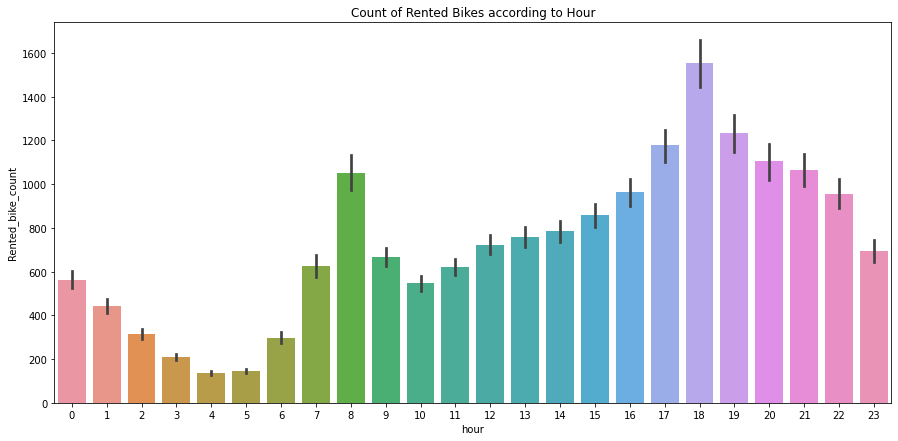

In [56]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'hour' , y = 'Rented_bike_count', data = df)
ax.set_title('Count of Rented Bikes according to Hour')
plt.show()

### Around 8am in the morning, and around 5-8 pm in the evening, we have the spike in the the bike renting.

### 18th hour, that is around 6pm, most of the bikes have been rented.. This is probably because many of the office workers returning from their shift like to rent bikes as their means of transport..

### Also, notice that there aren't any inactive hours for bike renting. Even at 4-5 am, there are more than 100 bikes being rented.

### Checking the hourly bike rent with respect to weekend days will give us a better understanding of the situation..

### <b>Rented Bike vs Hour wrt Weekends---

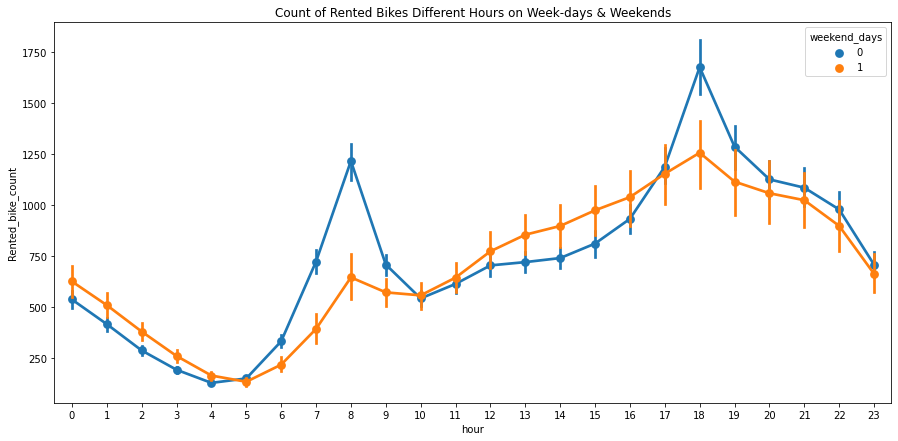

In [57]:
plt.figure(figsize=(15,7))
ax = sns.pointplot(x = 'hour' , y = 'Rented_bike_count', data = df, hue = 'weekend_days')
ax.set_title("Count of Rented Bikes Different Hours on Week-days & Weekends")
plt.show()

### Although, the count of bikes rented on weekends are much lesser, interestingly enough, we are seeing the same pattern on weekends as well as regular days..

### Around 6 pm in the evening, the count of bikes rents go up the most on both weekends and on regular days..

### <b>Effect of Functioning Day on hourly bike rentals ---</b>

In [58]:
# plt.figure(figsize=(15,7))
# ax = sns.pointplot(x = 'hour' , y = 'Rented_bike_count', data = df, hue = 'functioning_day')
# ax.set_title("Hourly Count of Rented Bikes according to functioning day")
# plt.show()

### No bikes are being rented on non-functioning days since these are the days when the services are probably off...

### <b>*Bike Rented vs Month* ---

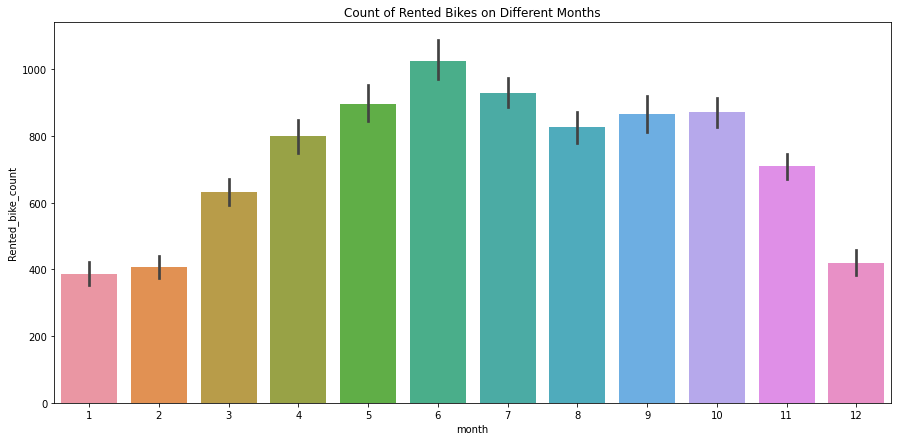

In [59]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'month' , y = 'Rented_bike_count', data = df)
ax.set_title('Count of Rented Bikes on Different Months')
plt.show()

### Months of January, February and December have the lowest number of bike rents of all twelve months..
### Let's check the holiday effect..

### <b>*Rented Bike Count vs Holidays* ---

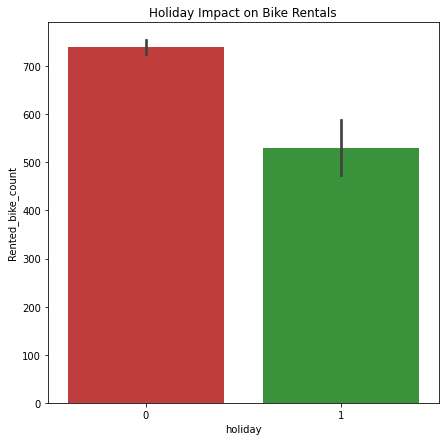

In [60]:
plt.figure(figsize=(7,7))
ax = sns.barplot(x = 'holiday' , y = 'Rented_bike_count', data = df, palette = ['tab:red', 'tab:green'])  # remember 1 is for holiday and 0 for non-holidays
ax.set_title('Holiday Impact on Bike Rentals')
plt.show()

### On Holidays, we have lesser bikes rented compared to non-holidays..
### Now, let's check how holidays play a role throughout the months..

### <b>*How Holidays effected rented bikes each month* ---

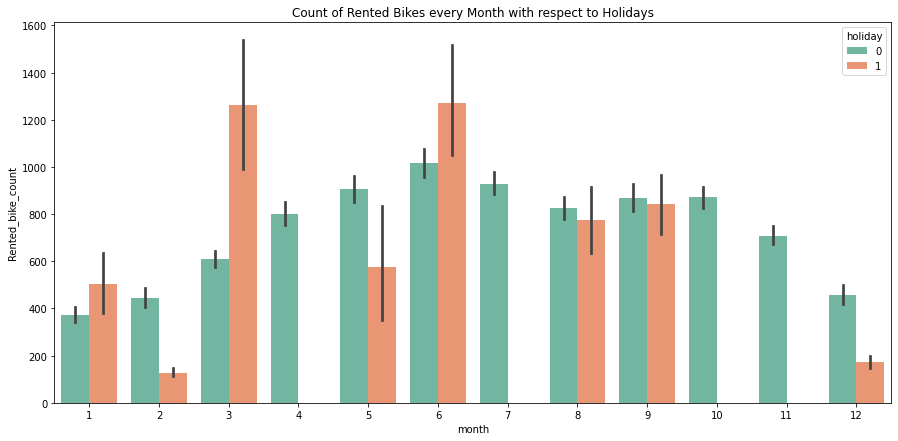

In [61]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'month' , y = 'Rented_bike_count', data = df , hue = 'holiday', palette = 'Set2')
ax.set_title('Count of Rented Bikes every Month with respect to Holidays')
plt.show()

### Only in the months of January, March and June, there were more bikes rented on holidays than working days.. Guess people love to go to vacations on these months and many like to use the bike rental services for that...

### <b>*Bike rented each Month depending on whether it was an Weekend* ---

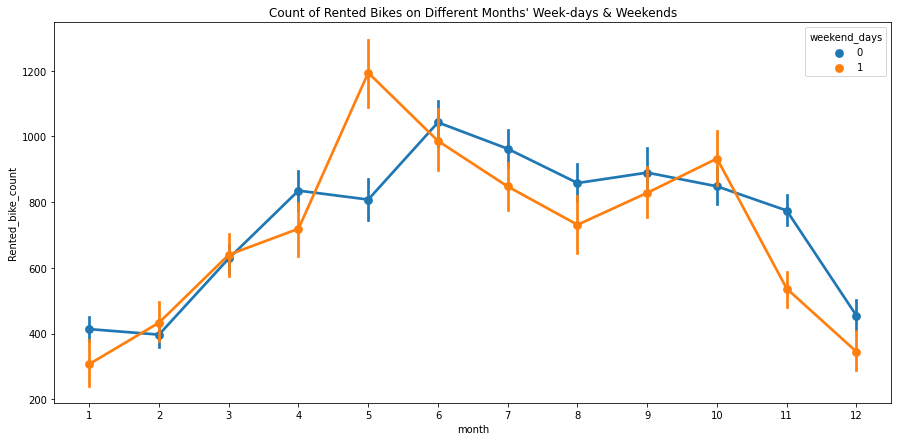

In [62]:
plt.figure(figsize=(15,7))
ax = sns.pointplot(x = 'month' , y = 'Rented_bike_count', data = df, hue = 'weekend_days')
ax.set_title("Count of Rented Bikes on Different Months' Week-days & Weekends")
plt.show()

### <b>*Seasonal effect on Rented Bike Counts* ---

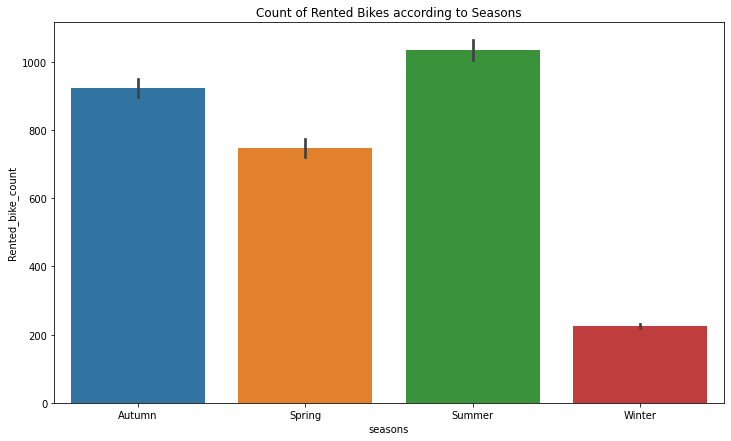

In [63]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x = 'seasons' , y = 'Rented_bike_count', data = df)
ax.set_title('Count of Rented Bikes according to Seasons')
plt.show()

### Winter is the least favourite season for people to rent bikes...

### Let's see how the hourly count is affected based on different seasons...

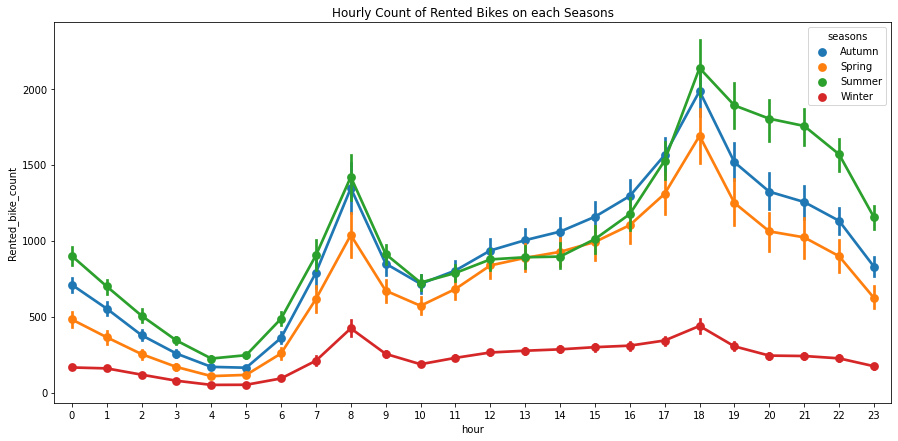

In [64]:
plt.figure(figsize=(15,7))
ax = sns.pointplot(x = 'hour' , y = 'Rented_bike_count', data = df, hue = 'seasons')
ax.set_title("Hourly Count of Rented Bikes on each Seasons")
plt.show()

### <b>*Seasonal effect on Bike count according to Holidays ---*

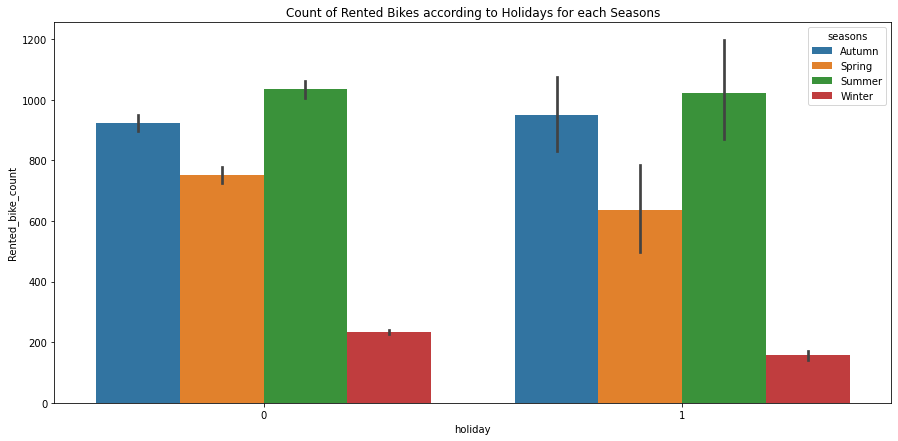

In [65]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'holiday' , y = 'Rented_bike_count', data = df , hue = 'seasons')
ax.set_title('Count of Rented Bikes according to Holidays for each Seasons')
plt.show()

### Holidays or non-holidays doesn't make much of a difference on bikes rentals in different seasons.. The distribution remains the same more or less...

### <b>*Rented Bike Count vs Snowfall ---*

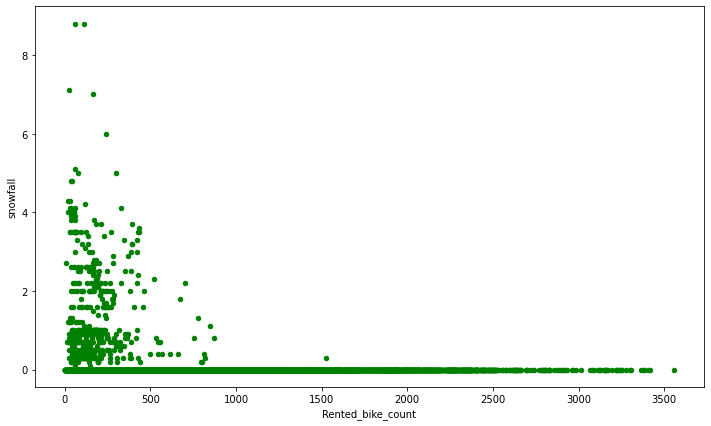

In [66]:
# plt.figure(figsize=(15,7))
df.plot.scatter(x = 'Rented_bike_count', y = 'snowfall', color='g', marker='o', figsize=(12,7))
plt.show()

### Snowfall is not good for business at all...

### <b>*Rented Bike vs Rainfall ---*

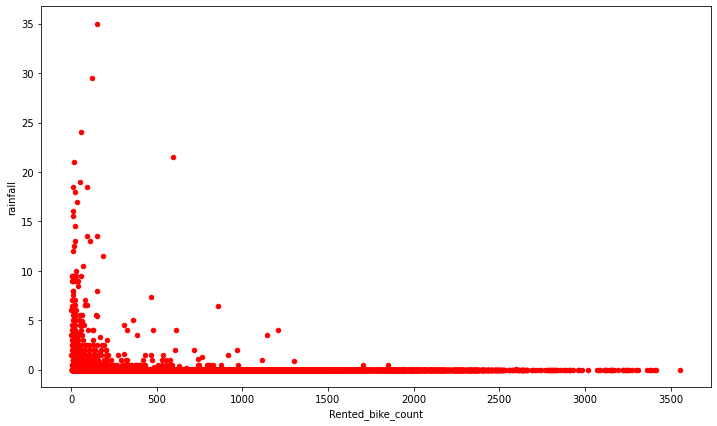

In [67]:
df.plot.scatter(x = 'Rented_bike_count', y = 'rainfall', color='r', marker='o', figsize=(12,7))
plt.show()

### Rainfall is also negatively affecting the number of bike rents..

### <b>*Encoding for categorical columns ---*

In [68]:
df.nunique(), df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_bike_count  8465 non-null   int64   
 1   hour               8465 non-null   category
 2   temperature        8465 non-null   float64 
 3   humidity           8465 non-null   int64   
 4   wind_speed         8465 non-null   float64 
 5   visibility         8465 non-null   int64   
 6   solar_radiation    8465 non-null   float64 
 7   rainfall           8465 non-null   float64 
 8   snowfall           8465 non-null   float64 
 9   seasons            8465 non-null   category
 10  holiday            8465 non-null   category
 11  month              8465 non-null   category
 12  weekend_days       8465 non-null   category
dtypes: category(5), float64(5), int64(3)
memory usage: 896.1 KB


(Rented_bike_count    2165
 hour                   24
 temperature           546
 humidity               90
 wind_speed             65
 visibility           1780
 solar_radiation       345
 rainfall               61
 snowfall               51
 seasons                 4
 holiday                 2
 month                  12
 weekend_days            2
 dtype: int64, None)

In [69]:
df.head(10)

,Rented_bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,month,weekend_days
0,254,0,-5.2,37,2.2,2000,0.00,0.0,0.0,Winter,0,1,0
1,204,1,-5.5,38,0.8,2000,0.00,0.0,0.0,Winter,0,1,0
2,173,2,-6.0,39,1.0,2000,0.00,0.0,0.0,Winter,0,1,0
3,107,3,-6.2,40,0.9,2000,0.00,0.0,0.0,Winter,0,1,0
4,78,4,-6.0,36,2.3,2000,0.00,0.0,0.0,Winter,0,1,0
5,100,5,-6.4,37,1.5,2000,0.00,0.0,0.0,Winter,0,1,0
6,181,6,-6.6,35,1.3,2000,0.00,0.0,0.0,Winter,0,1,0
7,460,7,-7.4,38,0.9,2000,0.00,0.0,0.0,Winter,0,1,0
8,930,8,-7.6,37,1.1,2000,0.01,0.0,0.0,Winter,0,1,0
9,490,9,-6.5,27,0.5,1928,0.23,0.0,0.0,Winter,0,1,0


### *Using the previously defined **time_mapper** method from the **Encoder** class, we tried to bin 24 hours time into five distinct bins, which helped us reduce a significant number of features, but also, having tested that on ML models, we found that it affected our model performance a lot.*

### *Our models were not being able to capture the right pattern and the variance from the 'Hours' column.*
### So, we decided to avoid the process...

In [70]:
# an array storing the time of day obtained from the previously defined time_wrapper method
# time_of_day = obj.time_mapper('hour')

# # adding the column 'time_of_day' to the dataframe and dropping the hours column
# df['time_of_day'] = time_of_day.tolist()

# df.drop('hour', inplace = True, axis = 1)

### One hot encoding other categorical variables

In [71]:
# declaring categorical columns to get dummies
categorical_cols = ['hour','seasons','month']

In [72]:
# one hot encoding
one_hot_encoded_data = pd.get_dummies(df, columns = categorical_cols, drop_first = True)
# print(one_hot_encoded_data)

In [73]:
pd.set_option('display.max_columns', None)

# checking the head
one_hot_encoded_data.head()

,Rented_bike_count,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,weekend_days,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Spring,seasons_Summer,seasons_Winter,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [74]:
# checking the tail
one_hot_encoded_data.tail()

,Rented_bike_count,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,weekend_days,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Spring,seasons_Summer,seasons_Winter,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
8755,1003,4.2,34,2.6,1894,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,1968,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,1859,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8759,584,1.9,43,1.3,1909,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [75]:
# shape of the dataframe now
one_hot_encoded_data.shape

(8465, 47)

### <b>*Declaring Dependent and Independent Variables and *Normalising and doing log transformation on top of it to get better model performance...*

### <b>Normalization</b> is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. The mean of the distribution is 0 and Standard deviation is 1...

Note : We have tried model training with the square root transformation of the dependant variable. But it was really messing up our model performance. So, we used lop10 transformation instead.

### <b>*The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. We are doing Train-test split with 80% of data being used for training and 20% of the data used to check the model performance...*

### <b>*Keeping the random state equals to 7 so that we get the same data as part of training and testing set everytime...*

In [76]:
### Declaring the Independent and Dependent variables x and y -------->

#  x variable 
x = one_hot_encoded_data.drop('Rented_bike_count', axis = 1)
# print(x)

# scaled y variable to avoids outliers influence as much as possible 
y = np.log10(one_hot_encoded_data['Rented_bike_count'])      
# y = one_hot_encoded_data['Rented_bike_count']
print(y)



### normalizing the independent variables------->
# define min max scaler
scaler = MinMaxScaler()

# doing the train_test_split on our data
x_train, x_test, y_train, y_test = train_test_split( x, y , test_size = 0.2, random_state = 7) 


# transform data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled)
print(x_test_scaled)

0       2.404834
1       2.309630
2       2.238046
3       2.029384
4       1.892095
          ...   
8755    3.001301
8756    2.883093
8757    2.841359
8758    2.852480
8759    2.766413
Name: Rented_bike_count, Length: 8465, dtype: float64
[[0.34965035 0.66326531 0.25675676 ... 0.         0.         0.        ]
 [0.44230769 0.37755102 0.12162162 ... 0.         0.         0.        ]
 [0.21853147 0.53061224 0.21621622 ... 0.         0.         0.        ]
 ...
 [0.6958042  0.55102041 0.36486486 ... 0.         0.         0.        ]
 [0.88461538 0.63265306 0.08108108 ... 0.         0.         0.        ]
 [0.4020979  0.85714286 0.09459459 ... 0.         0.         1.        ]]
[[0.82167832 0.74489796 0.25675676 ... 0.         0.         0.        ]
 [0.7534965  0.90816327 0.04054054 ... 1.         0.         0.        ]
 [0.50699301 0.79591837 0.14864865 ... 1.         0.         0.        ]
 ...
 [0.3513986  0.60204082 0.51351351 ... 0.         0.         0.        ]
 [0.33216783 0.367

In [77]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(6772, 46)
(1693, 46)


### We have 6772 observations in the train set and 1693 observations in our testing data..

## <B>Models Implementations :

We will be training different regression models and then check their performances against unseen test data.

In [78]:
# creating instances for different models
lin_reg = LinearRegression()
lasso  = Lasso(alpha=0.1 , max_iter= 3000)
ridge  = Ridge(alpha=0.1 , max_iter= 3000)
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)
knn_model = KNeighborsRegressor(n_neighbors = 5)
dt_reg = DecisionTreeRegressor( max_leaf_nodes=200, random_state=7)
rf_reg = RandomForestRegressor(n_estimators = 20,  random_state=7)
gb_model = GradientBoostingRegressor(n_estimators= 500,max_depth= 4,min_samples_split= 5,learning_rate= 0.1,loss= "squared_error",random_state= 7)
xgb_reg = xgb.XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, subsample=0.7, random_state= 7)

In [79]:
regs = {
    'LinearReg' : lin_reg,
    'Lasso' : lasso, 
    'Ridge': ridge, 
    'Elasticnet': elasticnet, 
    'Knn': knn_model, 
    'DecisionTree': dt_reg, 
    'RandomForest': rf_reg, 
    'GradientBoost': gb_model, 
    'XGboost': xgb_reg,
}

In [80]:
def train_regressor(reg,X_train,y_train,X_test,y_test):

  '''This function takes model, train and test data for both independant and dependant variables as inputs. 
  It will fit the models for the training data, make predictions on the test data and return Mean Squared Error , 
  Root mean squared error, R squared and Adjusted R squared values for those models'''

  reg.fit(X_train,y_train)
  y_pred = reg.predict(X_test)

  MSE  = mean_squared_error((y_test), (y_pred))
  RMSE = np.sqrt(MSE)
  R2_score = r2_score((y_test), (y_pred))
  Adjusted_R2_score = 1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))


  return MSE, RMSE, R2_score, Adjusted_R2_score

In [81]:
# lists that will store the model performances
MSE = []
RMSE = []
R2_score = []
Adjusted_R2_score = []

# training models in a loop
for name,reg in regs.items():
    
    mse_score, rmse_score, r2, adj_r2 = train_regressor(reg, x_train_scaled,y_train,x_test_scaled,y_test)
    
    print("For ",name)
    print("MSE - ",mse_score)
    print("RMSE - ",rmse_score)
    print("R2_score - ",r2)
    print("Adjusted_R2_score - ",adj_r2)
    print('\n')
    
    MSE.append(mse_score)
    RMSE.append(rmse_score)
    R2_score.append(r2)
    Adjusted_R2_score.append(adj_r2)

For  LinearReg
MSE -  0.06221322022714133
RMSE -  0.24942578099936127
R2_score -  0.7404363246058108
Adjusted_R2_score -  0.6203714048404501


For  Lasso
MSE -  0.2377837538693279
RMSE -  0.4876307556638813
R2_score -  0.007927497113806914
Adjusted_R2_score -  -0.261034007851042


For  Ridge
MSE -  0.062204883840803436
RMSE -  0.2494090692833832
R2_score -  0.7404711053657436
Adjusted_R2_score -  0.6196802257090965


For  Elasticnet
MSE -  0.06403116999966563
RMSE -  0.253043810435398
R2_score -  0.7328515424177867
Adjusted_R2_score -  0.605998217124688


For  Knn
MSE -  0.08957585055436197
RMSE -  0.2992922494057639
R2_score -  0.62627497963355
Adjusted_R2_score -  0.6535238891231439


For  DecisionTree
MSE -  0.048609677281822763
RMSE -  0.22047602427888335
R2_score -  0.7971925187455434
Adjusted_R2_score -  0.7946784816105436


For  RandomForest
MSE -  0.032182210266333756
RMSE -  0.17939400844602854
R2_score -  0.8657305834910961
Adjusted_R2_score -  0.8599794413371039


For  Gradi

In [82]:
performance_df = pd.DataFrame({'Algorithm':regs.keys(), 'R2_score': R2_score, 'MSE': MSE,'RMSE': RMSE, 'Adjusted_R2_score': Adjusted_R2_score}).sort_values(['R2_score', 'MSE'],ascending=False)

In [83]:
performance_df

,Algorithm,R2_score,MSE,RMSE,Adjusted_R2_score
8,XGboost,0.899535,0.024080,0.155177,0.889531
7,GradientBoost,0.887474,0.026971,0.164227,0.888421
6,RandomForest,0.865731,0.032182,0.179394,0.859979
5,DecisionTree,0.797193,0.048610,0.220476,0.794678
2,Ridge,0.740471,0.062205,0.249409,0.619680
0,LinearReg,0.740436,0.062213,0.249426,0.620371
3,Elasticnet,0.732852,0.064031,0.253044,0.605998
4,Knn,0.626275,0.089576,0.299292,0.653524
1,Lasso,0.007927,0.237784,0.487631,-0.261034


### As we can see, our XGBoost model and Gradient Boost model is performing the best among all the 9 different models that we tested upon.
### The XGboost model is having the R2 score of 0.9 approx and mean squared error value is 0.024 with the best Adjusted R2 score of 0.88 
### Since, <b>XGBoost</b> is giving the the least mean squared error, best R2 score and Adjusted R2 Score, it will be our top pick.
---

### Let's make a few predictions with the help of XGboost model and compare them with the original values

In [84]:
test_preds_xgb = xgb_reg.predict(x_test_scaled)

In [85]:
# inversing the previously made log transformation and showcasing 10 values for 'y' variable in the test data
act = np.array(10**(y_test[10:20]))

In [86]:
# checking the same 10 values predicted by our best model
prd = np.ceil(10**(test_preds_xgb[10:20]))

In [87]:
pd.DataFrame(list(zip(act, prd)) , columns =['Predictions', 'Actual'] )

,Predictions,Actual
0,937.0,929.0
1,714.0,720.0
2,2334.0,2203.0
3,1069.0,1149.0
4,1654.0,1764.0
5,517.0,522.0
6,620.0,825.0
7,388.0,477.0
8,1070.0,797.0
9,1898.0,1446.0


These predictions seem pretty close to the original values...

## <b>Let's try running Grid Search with cross validation and check...</b>

### *GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. The model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.*

## <b> Running Grid Search Cross Validation for Lasso Regression </b>

In [88]:
# Hyperprarameter tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [89]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.07646688252669896


In [90]:
#Model Prediction
y_pred_lasso_cv = lasso_regressor.predict(x_test_scaled)

In [91]:
MSE  = mean_squared_error((y_test), (y_pred_lasso_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso_cv))
print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.06205958109020625
RMSE : 0.24911760493832275
R2 : 0.7410773320785258


### *Running GridSearch worked well enough and gave an R2 score of 0.74 and MSE value of 0.06*

### *This is similar to that of the Linear Regression model..*

## <b> Running Grid Search Cross Validation for Ridge Regression </b>

In [92]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [93]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0764744398033898


In [94]:
#Model Prediction
y_pred_ridge_cv = ridge_regressor.predict(x_test_scaled)

In [95]:
MSE  = mean_squared_error((y_test), (y_pred_ridge_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge_cv))
print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.06221208699845233
RMSE : 0.2494235093138823
R2 : 0.7404410526202505


### *Ridge Regression with or without GridSearch gave almost same results..*

---



## <b> Running Grid Search Cross Validation for Elastic Net Regression

In [96]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=3)
elastic_regressor.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [97]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.6}

Using  {'alpha': 0.0001, 'l1_ratio': 0.6}  the negative mean squared error is:  -0.07644604886851193


In [98]:
y_pred_elastic = elastic_regressor.predict(x_test_scaled)

In [99]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.06212043658854989
RMSE : 0.24923971711697535
R2 : 0.7408234330396983


### *In both cases, Elstic Net Regression gave somewhat of a same R2 score of 0.74*
---

## <b> Running Grid Search Cross Validation for Decision Tree Regression

### *We will be doing hyperparameter tuning such as giving preferable maximium leaf node, minimum sample split, maximum depth and best splitter...*

In [100]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [101]:
# Hyperparameter tuning

dt_reg = DecisionTreeRegressor(random_state = 7)
grid_values = { 'max_leaf_nodes':[50, 80, 100, 125, 150], 'min_samples_split': [10, 15, 20], 'max_depth':[7, 10, 12], "splitter":["best","random"]}
dt_reg_cv = GridSearchCV(dt_reg, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=3)

# Fit the object to train dataset
dt_reg_cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=7),
             param_grid={'max_depth': [7, 10, 12],
                         'max_leaf_nodes': [50, 80, 100, 125, 150],
                         'min_samples_split': [10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [102]:
# best parameters for Dt regressor decided by GridSearch
dt_reg_cv.best_params_

{'max_depth': 12,
 'max_leaf_nodes': 80,
 'min_samples_split': 10,
 'splitter': 'best'}

In [103]:
train_preds_dt_cv =  dt_reg_cv.predict(x_train_scaled)
test_preds_dt_cv  = dt_reg_cv.predict(x_test_scaled)

In [104]:
r2_train = r2_score((y_train), (train_preds_dt_cv))
r2_train

0.8209548269368134

In [105]:
MSE  = mean_squared_error((y_test), (test_preds_dt_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (test_preds_dt_cv))
print("R2 :" ,r2)

MSE : 0.055014197626757425
RMSE : 0.23455105547994753
R2 : 0.7704718180038245


### *MSE score is 0.05 and R2 score is 0.77*


---



## <b> Running Grid Search Cross Validation for Random Forest Regressor

In [106]:
# Hyperparameter tuning

rf_regressor = RandomForestRegressor(random_state= 7) 
grid_values = {'n_estimators':[200, 250, 300], 'max_depth':[3, 5, 7], 'min_samples_split': [2, 5, 10]}
rf_regressor = GridSearchCV(rf_regressor, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=3)

# Fit the object to train dataset
rf_regressor.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=7),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 250, 300]},
             scoring='neg_mean_squared_error')

In [107]:
train_preds_rf =  rf_regressor.predict(x_train_scaled)
test_preds_rf  = rf_regressor.predict(x_test_scaled)

In [108]:
rf_regressor.best_params_

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 250}

In [109]:
r2_train = r2_score((y_train), (train_preds_rf))
r2_train

0.8147962400942086

In [110]:
MSE  = mean_squared_error((y_test), (test_preds_rf))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (test_preds_rf))
print("R2 :" ,r2)

MSE : 0.052795176712401505
RMSE : 0.22977201028933333
R2 : 0.7797299342402755


### *MSE score is 0.05 and R2 score is 0.78*
---

# <b>Conclusion :

### *With that, we have come to an end of our project. To summarize the entire process -* 

### 1. *We performed data cleaning and EDA. Used visualizations to better understand the relations between the various features that were present in our data.*

### 2. *We came to an understanding of how different features impact the number of bikes that are being rented, the effect of weather conditions, temperature and holidays on bike rents. We also figured out which were the busiest hours of the day for business.*

### 3. *In the pre-processing step,we removed multicollinearity and unimportant features from the data. Encoding and feature scaling were done. So that the data can be passed through our ML models for training and validation.*

### 4. *Finally models were trained to make predictions with the least margin of error possible.*

## <b> Regarding the Regression models :
### *Having implemented various Regression models and trying out a number of techniques, we come to the conclusion that the models that performed the best were XGBoost and Gradient Boosting model.*

### *We could choose any of these models, but even comparing the scores among them, we could say that XGBoost model performance outshines all the rest.*

### <b>*XGboost</b> model captured the most variance and gave the best predictions with the least error among all the models we implemented. XGBoost generalized the data the best. So, it's safe to say, our model is ready for deployment and make predictions.*
.
.
.

### *In the end, we can say that our project will aid the business to understand the bike renting situation much better. With the assistance of the machine learning models and our analysis of the industry, the business will be able to understand when the demand for bikes will be high. Thus, they will be able to keep up with the supply in order to maximize the  profits.*
----
----